In [1]:
import os
import sys
import warnings
import numpy as np
import pandas as pd
import json

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

warnings.filterwarnings(action='ignore')

if get_ipython():
    print("jupyter envirionment")
    PROJECT_DIR = os.path.abspath(os.path.join(os.path.dirname('__file__'), '..'))
    from tqdm import tqdm_notebook as tqdm  # 이거 안해주면 한 줄씩 출력됨 ;;
else:
    print("command shell envirionment")
    PROJECT_DIR = os.path.abspath(os.path.join(os.path.dirname(__file__), '..'))
    from tqdm import tqdm

# sys.pathdp PROJECT_DIR 추가
sys.path.insert(0, PROJECT_DIR)

jupyter envirionment


## Data 확인 

In [5]:
with open('train.jsonl', 'r') as json_file:
    json_list = list(json_file)

trains = []
for json_str in json_list:
    line = json.loads(json_str)
    trains.append(line)

train_df = pd.DataFrame(trains)
train_df.head()

,media,id,article_original,abstractive,extractive
0,당진시대,327827480,[당진시 문화관광과를 대상으로 하는 행정사무감사에서 당진시립합창단 관계자가 보낸 것...,지난 6일 당진시의회 행정사무감사에서 '합창단이 소리를 작게 낼 것이니 알고 있으라...,"[0, 1, 2]"
1,국제신문,339840364,[미국 메이저리그(MLB)에서 활동하는 한국 선수들의 시즌 초반 희비가 엇갈리고 있...,LA 에인절스의 최지만이 맹활약을 하여 시즌 타율 0.250에서 0.313으로 올리...,"[0, 1, 3]"
2,기호일보,371071597,"[인천 부영공원 운영 생활야구협회 80여 동호회 팀에 260만 원씩 받아, 국유지로...",16일 부평구와 협회 등에 따르면 부영공원 안에 있는 야구장을 구생활체육야구협회가 ...,"[6, 7, 10]"
3,대구일보,354806783,[대구·경북첨단의료산업진흥재단 의약생산센터는 항암주사제 무균충전 시설을 갖추고 있다...,대구·경북첨단의료산업진흥재단 의약생산센터는 약사법 시행규칙에서 정한 바에 따라 전용...,"[1, 6, 4]"
4,대구신문,347022773,[국내 유통되는 탄산음료 중 식품의약품안전처에 품질인증을 받은 제품이 하나도 없는 ...,식품의약품안전처는 29일 어린이가 즐겨마시는 음료를 대상으로 영양성분을 조사한 결과...,"[2, 3, 10]"


In [6]:
train_df['extractive_sents'] = train_df.apply(lambda row: list(np.array(row['article_original'])[row['extractive']]) , axis=1)
train_df['no_extractive_sents'] = train_df.apply(lambda row: [sent for sent in row['article_original'] if sent not in row['extractive_sents']] , axis=1)
train_df.head()

,media,id,article_original,abstractive,extractive,extractive_sents,no_extractive_sents
0,당진시대,327827480,[당진시 문화관광과를 대상으로 하는 행정사무감사에서 당진시립합창단 관계자가 보낸 것...,지난 6일 당진시의회 행정사무감사에서 '합창단이 소리를 작게 낼 것이니 알고 있으라...,"[0, 1, 2]",[당진시 문화관광과를 대상으로 하는 행정사무감사에서 당진시립합창단 관계자가 보낸 것...,"[문제의 문자메세지를 전달받은 문화관광과는 감사법무담당관에게 조사를 의뢰했다., 권..."
1,국제신문,339840364,[미국 메이저리그(MLB)에서 활동하는 한국 선수들의 시즌 초반 희비가 엇갈리고 있...,LA 에인절스의 최지만이 맹활약을 하여 시즌 타율 0.250에서 0.313으로 올리...,"[0, 1, 3]",[미국 메이저리그(MLB)에서 활동하는 한국 선수들의 시즌 초반 희비가 엇갈리고 있...,[최지만은 2일(한국시간) 미국 플로리다주 세인트피터즈버그 트로피카나 필드에서 열린...
2,기호일보,371071597,"[인천 부영공원 운영 생활야구협회 80여 동호회 팀에 260만 원씩 받아, 국유지로...",16일 부평구와 협회 등에 따르면 부영공원 안에 있는 야구장을 구생활체육야구협회가 ...,"[6, 7, 10]",[16일 부평구와 협회 등에 따르면 부영공원 안에 있는 야구장을 구생활체육야구협회가...,"[인천 부영공원 운영 생활야구협회 80여 동호회 팀에 260만 원씩 받아, 국유지로..."
3,대구일보,354806783,[대구·경북첨단의료산업진흥재단 의약생산센터는 항암주사제 무균충전 시설을 갖추고 있다...,대구·경북첨단의료산업진흥재단 의약생산센터는 약사법 시행규칙에서 정한 바에 따라 전용...,"[1, 6, 4]",[대구·경북첨단의료산업진흥재단(이하 대구첨복재단) 의약생산센터는 주세제 특수제제인 ...,[대구·경북첨단의료산업진흥재단 의약생산센터는 항암주사제 무균충전 시설을 갖추고 있다...
4,대구신문,347022773,[국내 유통되는 탄산음료 중 식품의약품안전처에 품질인증을 받은 제품이 하나도 없는 ...,식품의약품안전처는 29일 어린이가 즐겨마시는 음료를 대상으로 영양성분을 조사한 결과...,"[2, 3, 10]",[식품의약품안전처는 29일 여름철 어린이가 즐겨 마시는 탄산음료 282개와 혼합음료...,[국내 유통되는 탄산음료 중 식품의약품안전처에 품질인증을 받은 제품이 하나도 없는 ...


## EDA
### 1. media 분포 확인 

In [7]:
train_df['media'].value_counts()

기호일보      7166
국제신문      6678
대전일보      4831
광주일보      4155
남도일보      4148
광주매일신문    3783
대구신문      3750
대구일보      3060
경기일보      2319
당진시대      2014
광양신문       899
Name: media, dtype: int64

총 11개의 미디어로부터 데이터가 구성되어 있다. 가장 수가 적은 광양신문도 899개로 적지 않아, 미디어 별로 요약문 특성이 다르다면 좋은 정보가 될 수 있다. 

### 2. 원문 (article_original)

In [8]:
train_df['article_original'][1]

['미국 메이저리그(MLB)에서 활동하는 한국 선수들의 시즌 초반 희비가 엇갈리고 있다.',
 'LA 에인절스의 최지만은 맹활약으로 주전 입지를 굳혀가는 반면 텍사스 레인저스의 추신수는 개막전 선발에서 밀려나는 수모를 당한 뒤에서도 좀처럼 반등을 하지 못하고 있다.',
 '최지만은 2일(한국시간) 미국 플로리다주 세인트피터즈버그 트로피카나 필드에서 열린 2019 미국프로야구 메이저리그 콜로라도 로키스와 홈경기에 3번 타자 1루수로 선발 출전해 4타수 2안타를 치고 1득점을 올렸다.',
 '시즌 타율은 0.250에서 0.313(16타수 5안타)로 올랐다.',
 '최지만은 개막전에서 4타수 무안타로 침묵했으나 이후 3경기 연속 안타이자 2경기 연속 멀티 히트를 뽑아내며 입지를 굳혀갔다.',
 '2016년 LA 에인절스 소속으로 메이저리그에 데뷔한 최지만이 2경기 연속 멀티 히트를 친 것은 이번이 처음이다.',
 '스코어가 벌어진 탓에 콜로라도 불펜의 필승조인 오승환과 최지만의 맞대결은 성사되지 않았다.',
 '추신수는 들쭉날쭉한 출전 일정 탓인지 타격감을 찾지 못하고 있다.',
 '추신수는 이날 텍사스주 알링턴 글로브 라이프 파크에서 열린 휴스턴 애스트로스와 홈경기에 1번 지명타자로 선발 출전했지만 4타수 무안타로 침묵했다.',
 '시즌 타율은 0.167에서 0.100(10타수 1안타)로 떨어졌다.',
 '추신수는 11년 만에 개막전 선발 라인업에서 제외되는 등 이날까지 텍사스가 치른 4경기 가운데 2경기에만 선발 출전했다.',
 '크리스 우드워드 텍사스 감독은 상대 선발이 좌완이면 좌타자인 추신수 대신 우타자인 헌터 펜스를 선발 지명타자로 기용하고 있다.',
 '텍사스(2승 2패)는 휴스턴 마운드에 2안타로 꽁꽁 묶이며 1-2로 패해 2연승 행진을 마감했다.',
 '한편 피츠버그 파이리츠의 강정호는 914일 만에 홈경기에 나섰지만 안타를 만들어내지 못했다.',
 '이날 펜실베이니아주 피츠버그의 PNC 파크에서 열린 세인트루이스 카디널스와 홈 개막전에 선발 라인업

article_original 데이터는 문장이 이미 분리되어 list로 저장되어 있기 때문에 sentence tokenizing 과정 없이 바로 분석이 가능하다. 

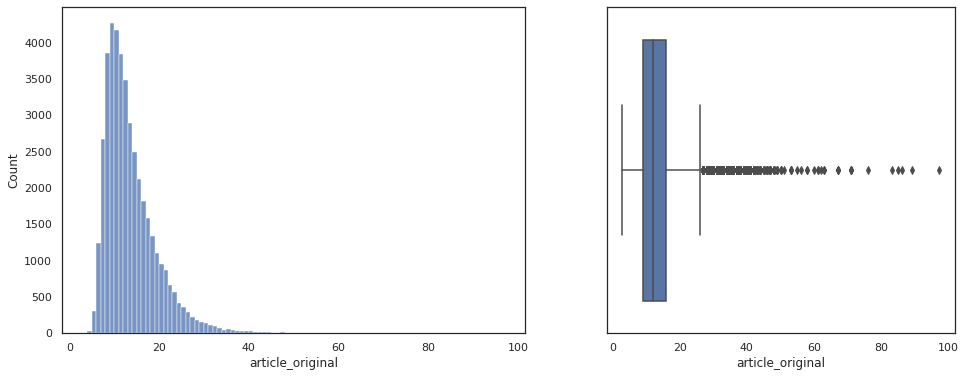

In [9]:
# sentence
original_sent_counts = train_df['article_original'].apply(len)

fig, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw=dict(width_ratios=[4, 3]))
sns.histplot(original_sent_counts, binwidth=1, ax=axs[0])
sns.boxplot(original_sent_counts, ax=axs[1])

In [10]:
original_sent_counts.describe()

count    42803.000000
mean        13.256594
std          5.965359
min          3.000000
25%          9.000000
50%         12.000000
75%         16.000000
max         97.000000
Name: article_original, dtype: float64

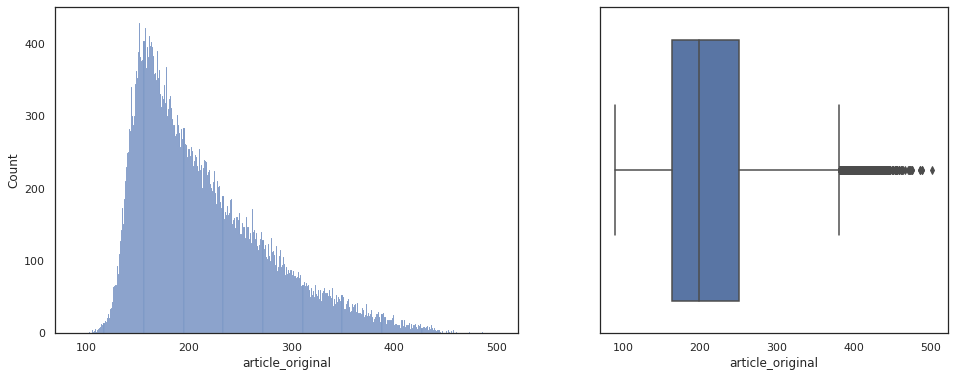

In [11]:
# word 수
original_word_counts = train_df['article_original'].apply(lambda x:len(' '.join(x).split(' ')))

fig, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw=dict(width_ratios=[4, 3]))
sns.histplot(original_word_counts, binwidth=1, ax=axs[0])
sns.boxplot(original_word_counts, ax=axs[1])

In [12]:
original_word_counts.describe()

count    42803.000000
mean       214.226456
std         64.350373
min         90.000000
25%        164.000000
50%        198.000000
75%        251.000000
max        501.000000
Name: article_original, dtype: float64

본문의 길이는 평균 13문장 및 214개 정도의 단어로 구성되어 있다. 이는 기존 summary task에서 많이 쓰는 CNN이나 DailyMail 같은 데이터와 비교했을 때, 상당히 길이가 적은 편이다. 

### 3. 생성요약 정답값 column

In [13]:
train_df['abstractive'][0]

"지난 6일 당진시의회 행정사무감사에서 '합창단이 소리를 작게 낼 것이니 알고 있으라'라는 문자 등으로 불거진 합창단의 의무 불이행 논란에 대해 행정사무조사특별위원회를 구성해 조사를 수행하겠다는 의견을 표명했다."

#### Novel N-gram

원문 문장(article_original)과 사람이 생성한 요약문장(abstract) 간 단어가 얼마나 겹치는지 확인 

In [14]:
def n_grams(tokens, n):
    """
    If length of tokens less then n, return empty list
    """
    l = len(tokens)
    return [tuple(tokens[i:i + n]) for i in range(l) if i + n <= l]

In [15]:
def cal_novel(source, summary, n=2, use_tokenizer=False):
    if use_tokenizer == True:
        pass
#         tokenizer = Mecab()
#         source_tokens = tokenizer.morphs(source)
#         summary_tokens = tokenizer.morphs(summary)
    else:
        source_tokens  = source.split()
        summary_tokens = summary.split()
        
    source_grams = set(n_grams(source_tokens, n))
    summary_grams = set(n_grams(summary_tokens, n))

    joint = summary_grams.intersection(source_grams)
    novel = summary_grams - joint

    return len(novel), len(summary_grams)

        
def cal_novel_repeat(source_lines, summary_lines, n=2, use_tokenizer=False):
    assert len(source_lines) == len(summary_lines)
    
    lines = zip(source_lines, summary_lines)
    
    novel_n_grams_prop_list = []
    total_novel_grams_num = 0
    total_summary_grams_num = 0
    for source, summary in lines:
        novel_grams_num, summary_grams_num = cal_novel(source, summary, n, use_tokenizer)
        novel_n_grams_prop_list.append(novel_grams_num / (summary_grams_num + 1e-6))
        total_novel_grams_num += novel_grams_num
        total_summary_grams_num += summary_grams_num
    return novel_n_grams_prop_list, total_novel_grams_num, total_summary_grams_num

In [16]:
## 적용 
origin_text = train_df['article_original'].apply(lambda l: ' '.join(l) )
summary_text = train_df['abstractive']

0.29965738845226947


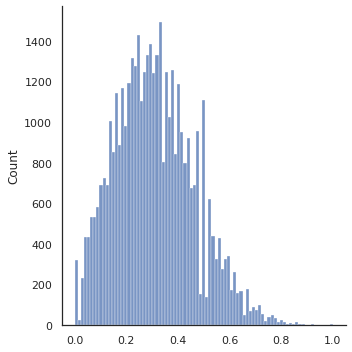

In [17]:
# 1-gram
novel_n_grams_prop_list, total_novel_grams_num, total_summary_grams_num = cal_novel_repeat(origin_text, summary_text, 1)
print(total_novel_grams_num / total_summary_grams_num)
sns.displot(novel_n_grams_prop_list)

0.5465292075477393


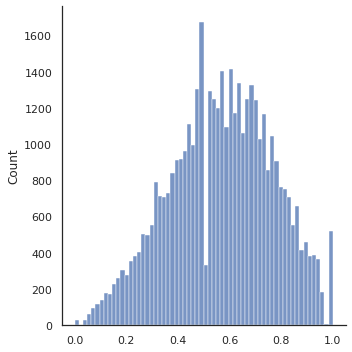

In [18]:
# 2-gram
novel_n_grams_prop_list, total_novel_grams_num, total_summary_grams_num = cal_novel_repeat(origin_text, summary_text, 2)
print(total_novel_grams_num / total_summary_grams_num)
sns.displot(novel_n_grams_prop_list)

#### sentence 분포 

In [22]:
!pip install kss
import kss

In [39]:
last_char = set()
counter = 5

for abstractive in train_df['abstractive'].values:
    sents_splited = kss.split_sentences(abstractive)
    if len(sents_splited) > 1:
        if counter > 0:
            print(sents_splited)
            counter -= 1
        for sent_splited in sents_splited:
            last_char.add(sent_splited)
last_char

['3일 한국자동차산업협회와 한국수입자동차협회에 따르면 한국지엠(GM)과 르노삼성 등 국내 완성차업체가 모회사의 해외 생산 차량을 수입해 국내에 판매하는 OEM 수입차의 판매량이 2017년까지 하락세를 보이다', '지난해 반등했으며 수입차 대비 비중도 높아질 전망이다.']
['경기도 특별사법경찰단은 소방공사 기간에 해외여행 중이던 상주 감리원이 현장에서 업무 한 것처럼 감리일지를 거짓으로 작성하는 불법행위를 한 감리업체 9곳을 적발했으며, 이들이 없는 틈에  공사 현장에서는 주요', '소방공사가 그대로 시행됐다.']
['2019광주세계수영선수권대회 기간 중 조선대학교에서는 수영대회의 ‘백미’인 하이다', '이빙 경기가 치러지며 조선대 본관 건물과 무등산을 배경으로 27m 높은 곳에서 뛰어내리는 아찔한 광경을 순간 포착하는 등 전 세계에 광주를 알릴 수 있는 절호의 기회가 될 것으로 보이고 하이다', '이빙은 단순히 경기를 넘어서 역동적이고 예술적인 모습이 포착되는 종목이어서 관객들의 시선과 탄성을 자아낼 것으로 보인다.']
['전과 8범 A씨는 아동청소년 강간미수 혐의로 징역1년 3월형을 살고, 5년간 전자발찌 부착 명령상태에서 지난 17일 전자발찌를 끊고 도주하다', '광주 북부경찰서가 검거하여 부착기간이 2020년 8월14일까지 늘었다.']
['노르웨이 프리미엄 유아용품 전문 기업 스토케에서 부모가 서서 아이들을 목욕시킬 수 있는 신제품인 플렉시바스 스탠드를 출시함으로써 아이와의 목욕을 낯설어하던 육아대디, 배쓰 파파들에게 보다', '즐거운 목욕 시간을 가질 수 있을 것으로 기대한다.']


{'',
 '더불어민주당 지방혁신균형발전추진단과 대통령직속 국가균형발전위원회는 17일 신년간담회를 개최하고 2019년 균형발전을 위한 정책과 주요',
 '지난달 27~28일, 광주세계수영선수권대회조직위원회가 파워 블로거와 수영 전문인 등 20여 명을 초청해 국제방송센터와 남부대시립국제수영장, 수구경기장, 조선대하이다',
 '500명의 신청자 중 150명에 선정된 제7기 통일부어린이 기자 중 통일부 장관과의 만남을 주제로 한 인터뷰 기사를 써서 우수기사로 선정된 계성초 5학년 이다',
 "국정 과제와 관련한 성과 창출의 필요성으로 인해 지난해 군정운영에 대한 실적과 난점을 바탕으로 일자리 창출, 4차 산업혁명 등의 사업을 연계한 계획을'2019년 주요업무 추진계획 보고회'에서 밝혔다.",
 '농림축산식품부 국립농산품질관리원은 21일 설을 맞아 내달 1일까지 차례상에 오르는 주요',
 '가수 정준영이 구속된 가운데 2017년 디지털 성범죄는 전년보다 1280건이 늘어난 6465건이 발생하여 불법촬영물로 피해를 당하면 회복하기 어려운 고통을 겪는다는 점에서 보다',
 '횡단보도 사고 다발지점에 경찰관을 집중 배치한다고 29일 밝혔다.',
 '고민정 청와대 대변인은 8일 문대통령의 G20 정상회의에서 주요',
 '지난달 취업자가 26만여 명 증가하며 13개월 만에 가장 큰 폭으로 늘어났지만, 제조업 같은 주요',
 '루프는 유휴공간인 루프탑을 활용하고 싶은 소유주와 이용하고 싶은 소비자들에게 위치기반으로 대여 가능한 루프탑 정보를 매칭해주는 옥상공유 플랫폼이다.',
 "고용노동부와 전남도가 주체하고 한국장애인고용공단 전남지사와 한국장애인고용안정협회 전남지부가 주관해서 열리는 '전남도 장애인 기능경기대회'가 26일에 목포에서 개막한다.",
 '이번 토론회를 계기로 시는 사람이 살기 좋은 여주 만들기를 위한 주제를 선정해 시민이 참여하는 인구정책 토론회를 개최할 계획이며, 각계각층 시민의 의견을 받는 인구정책 창구를 일원화할 것이라고 밝혔다.',
 '송악읍 중흥리에 지난

kss 라이브러리를 활용하여 sentence split을 시행했으나, 실제로 문장이 나눠지지 않아야 하는 부분들 까지도 나누는 현상이 있다. 또한 일부 abstract summary에 이상 문자가 존재함을 확인함. 따라서 kss를 보완하여 sentence split을 시행함. 

In [40]:
for abstractive in train_df['abstractive'].values:
    sents_splited = kss.split_sentences(abstractive)
    if len(sents_splited) > 1:
        is_multi_sent = False
        for sent_splited in sents_splited:
            if sent_splited in ['?', ':', 'c', '‘', 'ㄱ', '\ufeff']:
                print(abstractive)

2017년 9월부터 2월까지 경남 산청군 단성면 연수원 및 야구장을 관리한 직원이 경성대 학내 게시판에 총장을 비판하는 글을 올렸다가 산청에 발령을 받았다며 국가인권위원회에 진정을 접수한 것으로 알려졌다.:
농촌지역 인구가 고령화하면서 농·어·임업 활동을 포기하거나 아예 업종을 바꾸는 전국적인 추세에 따라 '2018 농림어업조사' 결과에서 충남지역 농가는 12만 3000가구로 전년 12만 6000가구 대비 1.9% 줄었으며 어가, 임가도 일제히 감소한 것으로 나타났다.c


#### kss를 보완하여 sentence split 시행 

In [41]:
multi_abstractives = []
for abstractive in train_df['abstractive'].values:
    sents_splited = kss.split_sentences(abstractive)
    if len(sents_splited) > 1:
        is_multi_sent = False
        for sent_splited in sents_splited:
            if sent_splited[-1] in ['.','?' ]:
                is_multi_sent = True
            else:
                is_multi_sent = False
                break
        if is_multi_sent:
            multi_abstractives.append(sents_splited)
print(len(multi_abstractives))
multi_abstractives

84


[["자유한국당 소속 윤상현 국회 외교통일위원장은 29일 일제 강점기 강제 징용 피해자에 대한 일본 기업의 배상문제로 한일관계가 역대 최악이라며 일본의 '코리아 패싱(한국 때리기)'이 심각하다고 말했다.",
  '일본 정보는 일본 전범 기업들에 배상을 명령한 작년 10월의 한국 대법원 판결과 관련해 1965년 체결된 한일청구권협정에 따라 배상 문제는 해결된 것이라고 주장하며 판결 이행을 거부한 채 지난 20일 한국 정부에 제3국 위원을 포함한 중재위원회 개최를 요청했다.',
  '윤의원은 일본 중의원 외교위원장도 접촉해 징용 문제를 둘러싼 양국 간 갈등 해소 방안을 놓고 의견을 나눠보고 싶었지만 만나는 것조차 꺼리는 바람에 회동하지 못했다고 밝혔다.'],
 ["농림축산식품부는 청년층의 농업분야 창업 활성화를 위해 2019년 '청년창업농 영농정착지원사업' 대상자를 선발하고 각 시군을 통해 통보했으며, 앞으로 지원 대상자 1600명에 대해서는 최장 3년간 매월 100만원씩 창업자금과 함께 영농기술 교육 등 맞춤형 지원을 제공한다고 14일 발표했다.",
  '농식품부는 했다고 14일 밝혔다.'],
 ['남도일보 기고-인위적인 사고로 대형 인명·재산 피해가 발생되면 안전불감증이 불러온 대형참사 되풀이되고 있다.',
  '안전국민의식과 소방안전의식, 대처능력을 높이는 소방안전 조기교육이 시급하다.'],
 ["한전산업개발은 그린에너지 엑스포에서 통합형 ESS인 'KEPID-ESS-200'을 선보였다.",
  '이 장치는 100kW미만의 소규모 태양광 발전소와 연계할 수 있으며, 일반적인 배터리룸보다 외부 기온에 영향을 받지 않고  최적의 성능을 유지할 수 있는 장점이 있다.'],
 ['인천에너지전환네트워크는 인천시에 수도권 전력 소비의 20%를 맡는 영흥 석탄발전소가 2017년 기준 온실가스 3천196만7천t을 배출했으며, 이외에도 미세먼지, 해양에 배출하는 온배수 등으로 인근 주민과 해양생태계에 피해를 줘 석탄발전 폐쇄 로드맵 수립을 촉구했다.',
  '17일 인천시청

대부분이 1문장으로 구성되어 있으며 일부 (86개)만 2문장 이상으로 구성되어 있음.

#### word 분포 확인 

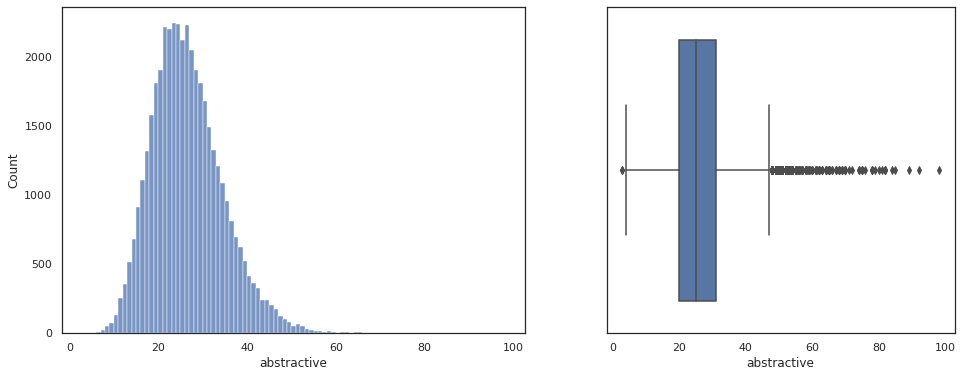

In [24]:
# word 수
import re
abstractive_word_counts = train_df['abstractive'].apply(lambda x:len(re.split('\s', x)))

fig, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw=dict(width_ratios=[4, 3]))
sns.histplot(abstractive_word_counts, binwidth=1, ax=axs[0])
sns.boxplot(abstractive_word_counts, ax=axs[1])

In [25]:
abstractive_word_counts.describe()

count    42803.000000
mean        26.187510
std          8.162073
min          3.000000
25%         20.000000
50%         25.000000
75%         31.000000
max         98.000000
Name: abstractive, dtype: float64

### 4. 추출 요약 정답값(extractive)

In [26]:
train_df['extractive'][1]

[0, 1, 3]

In [27]:
train_df['extractive_sents'][1]

['미국 메이저리그(MLB)에서 활동하는 한국 선수들의 시즌 초반 희비가 엇갈리고 있다.',
 'LA 에인절스의 최지만은 맹활약으로 주전 입지를 굳혀가는 반면 텍사스 레인저스의 추신수는 개막전 선발에서 밀려나는 수모를 당한 뒤에서도 좀처럼 반등을 하지 못하고 있다.',
 '시즌 타율은 0.250에서 0.313(16타수 5안타)로 올랐다.']

In [28]:
train_df['extractive_sents'].apply(lambda tmp_list: ' '.join(tmp_list) )

0        당진시 문화관광과를 대상으로 하는 행정사무감사에서 당진시립합창단 관계자가 보낸 것으...
1        미국 메이저리그(MLB)에서 활동하는 한국 선수들의 시즌 초반 희비가 엇갈리고 있다...
2        16일 부평구와 협회 등에 따르면 부영공원 안에 있는 야구장을 구생활체육야구협회가 ...
3        대구·경북첨단의료산업진흥재단(이하 대구첨복재단) 의약생산센터는 주세제 특수제제인 세...
4        식품의약품안전처는 29일 여름철 어린이가 즐겨 마시는 탄산음료 282개와 혼합음료 ...
                               ...                        
42798    칠곡북삼초등학교(교장 서금자)에서는 지난달 7일부터 18일까지 3-5학년 학생 중 ...
42799    최근 5년간, LH공공임대 임차인이 사망했으나 상속되거나 반환되지 못한 임대보증금이...
42800    경기도의 ‘DMZ 155마일 걷기’ 행사가 5일 오전 파주 임진각에서 열린 출정식을...
42801    지난 14일 기준 휘발유 가격이 가장 저렴한 곳은 AJ토탈(주)당진주유소(신평)였으...
42802    양승조 충남도지사는 12일 대기오염물질 배출 주요 사업장인 현대제철㈜ 당진공장을 찾...
Name: extractive_sents, Length: 42803, dtype: object

#### sentence 분포

In [29]:
import collections

temp = []
for l in train_df['extractive']:
    temp.append(len(l))
    
collections.Counter(temp)

Counter({1: 3, 2: 234, 3: 42566})

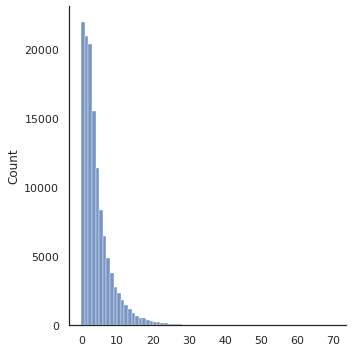

In [30]:
extractives = []
for extractive_idxes in train_df['extractive'].values:
    extractives += extractive_idxes

sns.displot(extractives, binwidth=1)  # , x="flipper_length_mm"

 데이터가 뉴스이므로, 글의 앞문장일수록 extractive summary에 포함될 확률이 굉장히 높음 

#### word 분포 

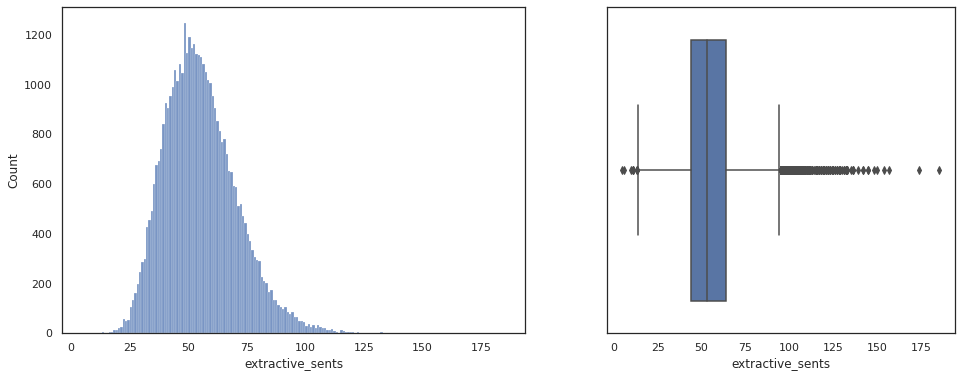

In [31]:
# word 수
extractive_word_counts = train_df['extractive_sents'].apply(lambda x:len(' '.join(x).split(' ')))

fig, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw=dict(width_ratios=[4, 3]))
sns.histplot(extractive_word_counts, binwidth=1, ax=axs[0])
sns.boxplot(extractive_word_counts, ax=axs[1])

### 5. 데이터 내 키워드 bi-gram 분포 

In [32]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

#### 키워드 추출 

In [ ]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

In [ ]:
%%bash
pip3 install pytest
TEST_DIR=$(mktemp -d -t test-XXXXXXXXXX)
git clone https://github.com/konlpy/konlpy --depth=1 $TEST_DIR
python3 -m pytest -v $TEST_DIR

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

In [ ]:
from konlpy.tag import Mecab
tokenizer = Mecab() 

fig,ax=plt.subplots(1,3,figsize=(15,15))

doc = train_df['abstractive']
doc = doc.apply(lambda sent: ' '.join(tokenizer.morphs(sent)))
top_n_bigrams=get_top_ngram(doc,2)[:20]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x,ax=ax[0]).set_title('In abstractive summary') # ,color=colors[i+1]

doc = train_df['extractive_sents'].apply(lambda tmp_list: ' '.join(tmp_list) )
doc = doc.apply(lambda sent: ' '.join(tokenizer.morphs(sent)))
top_n_bigrams=get_top_ngram(doc,2)[:20]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x,ax=ax[1]).set_title('In extractive summary') # ,color=colors[i+1]

doc = train_df['no_extractive_sents'].apply(lambda tmp_list: ' '.join(tmp_list) )
doc = doc.apply(lambda sent: ' '.join(tokenizer.morphs(sent)))
top_n_bigrams=get_top_ngram(doc,2)[:20]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x,ax=ax[2]).set_title('Not in extractive summary') # ,color=colors[i+1]

    
fig.suptitle("Common bigrams")

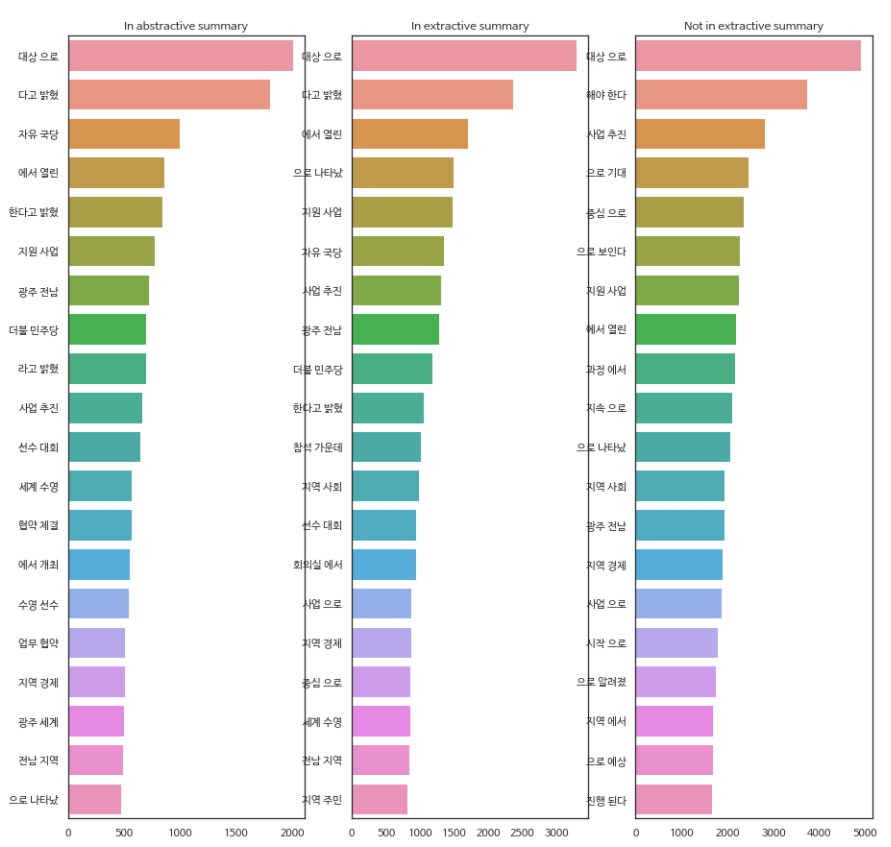